<a href="https://colab.research.google.com/github/ZenoZoldyck/hand_on_tensorflow/blob/main/A_larger_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
insurance = pd.read_csv("/content/insurance.csv")
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
# one hot encoding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [47]:
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [48]:
# creating train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(y), len(X_train), len(y_test)

(1338, 1338, 1070, 268)

In [49]:
# model creation

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
   tf.keras.layers.Dense(10, name = "hidden_layer_1"),
   tf.keras.layers.Dense(10, name = "hidden_layer_2"),
   tf.keras.layers.Dense(1, name = "output_layer")                            
])
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])
model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13270.4051 - mae: 13270.4051
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12894.8277 - mae: 12894.8277
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12620.7679 - mae: 12620.7679
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13247.7530 - mae: 13247.7530
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13065.5436 - mae: 13065.5436
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 12778.4015 - mae: 12778.4015
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12590.3453 - mae: 12590.3453
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12625.1679 - mae: 12625.1679
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 12026.0685 - mae: 12026.0685
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 11671.16

In [50]:
model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 6417.2144 - mae: 6417.2144


[6417.21435546875, 6417.21435546875]

In [51]:
# time to improve

tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
   tf.keras.layers.Dense(50, name = "hidden_layer_1"),
   tf.keras.layers.Dense(50, name = "hidden_layer_2"),
   tf.keras.layers.Dense(1, name = "output_layer")                            
])
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ["mae"])
history = model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 12280.4355 - mae: 12280.4355
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7509.0588 - mae: 7509.0588
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 6865.2532 - mae: 6865.2532
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7301.5391 - mae: 7301.5391
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 6890.4101 - mae: 6890.4101
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 6513.4335 - mae: 6513.4335
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 6244.2856 - mae: 6244.2856
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 6356.3897 - mae: 6356.3897
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 6026.3953 - mae: 6026.3953
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 5816.1341 - mae: 5816.13

In [52]:
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3189.0581 - mae: 3189.0581


[3189.05810546875, 3189.05810546875]

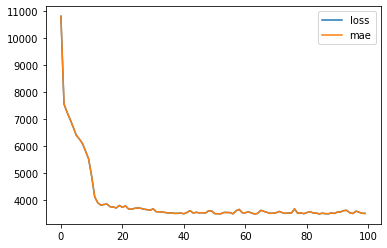

In [53]:
# time for some loss curves

pd.DataFrame(history.history).plot()
plt.ylabel = "loss"
plt.xlabel = "epochs"

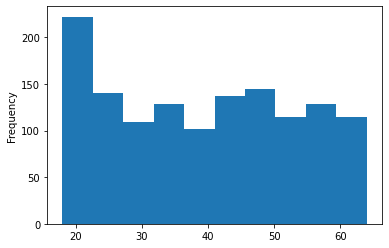

In [54]:
# normalization and standardization

X["age"].plot(kind = "hist")

In [55]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [56]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "children", "bmi"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop(["charges"], axis = 1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [57]:
X_train_normal[0]

array([0.60869565, 0.4       , 0.10734463, 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [60]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = "relu", name = "hidden_1"),
    tf.keras.layers.Dense(64, activation = "relu", name = "hidden_2"),
    tf.keras.layers.Dense(1, name = "output_layer")
])
model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ["mae"])

history = model_5.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13252.7725 - mae: 13252.7725
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 11242.0971 - mae: 11242.0971
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7483.2068 - mae: 7483.2068
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7613.9657 - mae: 7613.9657
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 6683.8411 - mae: 6683.8411
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 5540.0283 - mae: 5540.0283
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 4016.1337 - mae: 4016.1337
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 3733.0230 - mae: 3733.0230
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 3468.0437 - mae: 3468.0437
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 3390.3898 - mae: 3390.

In [61]:
model_5.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1778.6343 - mae: 1778.6343


[1778.63427734375, 1778.63427734375]

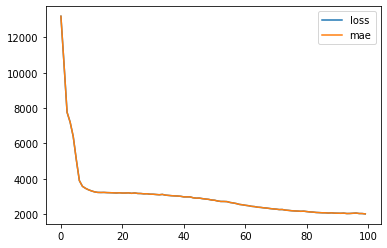

In [63]:
pd.DataFrame(history.history).plot()
ylabel = "loss"
xlabel = "epochs"